<a href="https://colab.research.google.com/github/khanh22010449/De_Quy/blob/main/B%C3%A0i_T%E1%BA%ADp_L%E1%BB%9Bn_AI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thu thập và làm sạch dữ liệu: 

##Khai báo dữ liệu

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.seasonal import seasonal_decompose


### Mở file

In [ ]:
df = pd.read_csv("chicago_air_pollution.csv")
df

,Unnamed: 0,city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
0,0,chic,31.5,31.500,1987-01-01,NaN,34.000000,4.250000,19.988095
1,1,chic,33.0,29.875,1987-01-02,NaN,NaN,3.304348,23.190994
2,2,chic,33.0,27.375,1987-01-03,NaN,34.166667,3.333333,23.815476
3,3,chic,29.0,28.625,1987-01-04,NaN,47.000000,4.375000,30.434524
4,4,chic,32.0,28.875,1987-01-05,NaN,NaN,4.750000,30.333333
...,...,...,...,...,...,...,...,...,...
6935,6935,chic,40.0,33.600,2005-12-27,23.560000,27.000000,4.468750,23.500000
6936,6936,chic,37.0,34.500,2005-12-28,17.750000,27.500000,3.260417,19.285628
6937,6937,chic,35.0,29.400,2005-12-29,7.450000,23.500000,6.794837,19.972222
6938,6938,chic,36.0,31.000,2005-12-30,15.057143,19.200000,3.034420,22.805556


Kiểm tra dữ liệu 

In [ ]:
df.isnull().sum()

Unnamed: 0       0
city             0
tmpd             1
dptp             2
date             0
pm25tmean2    4447
pm10tmean2     242
o3tmean2         0
no2tmean2        0
dtype: int64

### Xóa các hàng chứa giá trị null 

In [ ]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2488 entries, 4022 to 6939
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2488 non-null   int64  
 1   city        2488 non-null   object 
 2   tmpd        2488 non-null   float64
 3   dptp        2488 non-null   float64
 4   date        2488 non-null   object 
 5   pm25tmean2  2488 non-null   float64
 6   pm10tmean2  2488 non-null   float64
 7   o3tmean2    2488 non-null   float64
 8   no2tmean2   2488 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 194.4+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
city          0
tmpd          0
dptp          0
date          0
pm25tmean2    0
pm10tmean2    0
o3tmean2      0
no2tmean2     0
dtype: int64

### Chuyển sang kiểu dữ liệu chuẩn của ngày tháng

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year

df.head(10)

,Unnamed: 0,city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2,month,year
4022,4022,chic,48.0,46.7,1998-01-05,11.50,20.615385,2.800011,20.916074,1,1998
4028,4028,chic,18.0,7.1,1998-01-11,10.20,30.750000,5.708333,28.475000,1,1998
4034,4034,chic,23.0,21.9,1998-01-17,38.10,32.461538,3.180556,25.300000,1,1998
4040,4040,chic,28.0,25.8,1998-01-23,33.95,38.692308,1.750000,29.376299,1,1998
4046,4046,chic,37.0,30.6,1998-01-29,21.40,30.166667,3.097222,30.316667,1,1998
4052,4052,chic,32.0,25.6,1998-02-04,13.90,12.769231,24.738527,14.084420,2,1998
4058,4058,chic,39.0,33.9,1998-02-10,29.50,62.846154,4.977657,36.241634,2,1998
4064,4064,chic,42.0,35.3,1998-02-16,22.55,33.692308,11.430556,22.216667,2,1998
4070,4070,chic,44.0,35.0,1998-02-22,27.75,39.076923,11.833333,23.300000,2,1998
4076,4076,chic,41.0,33.2,1998-02-28,16.50,21.230769,12.680556,28.108333,2,1998


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2488 entries, 4022 to 6939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2488 non-null   int64         
 1   city        2488 non-null   object        
 2   tmpd        2488 non-null   float64       
 3   dptp        2488 non-null   float64       
 4   date        2488 non-null   datetime64[ns]
 5   pm25tmean2  2488 non-null   float64       
 6   pm10tmean2  2488 non-null   float64       
 7   o3tmean2    2488 non-null   float64       
 8   no2tmean2   2488 non-null   float64       
 9   month       2488 non-null   int64         
 10  year        2488 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 233.2+ KB


# Khám phá và trực quan hóa dữ liệu

### Xem thông tin thống kê của dữ liệu:

In [ ]:
df.describe()

,Unnamed: 0,tmpd,dptp,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2,month,year
count,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000
mean,5611.001206,51.446945,41.143569,16.225116,29.752514,20.602530,24.252707,6.663585,2001.851286
std,791.710912,19.117534,18.321561,8.675679,15.077657,11.178149,7.533184,3.408133,2.166100
min,4022.000000,-3.000000,-12.700000,1.700000,4.000000,0.500000,6.158333,1.000000,1998.000000
25%,5006.750000,36.000000,27.400000,9.732143,19.000000,11.540421,19.009246,4.000000,2000.000000
50%,5633.500000,53.000000,41.900000,14.659821,26.928571,20.177197,23.720969,7.000000,2002.000000
75%,6283.250000,68.000000,56.600000,20.600000,37.500000,28.409716,29.057292,10.000000,2004.000000
max,6939.000000,90.000000,76.600000,61.500000,97.500000,58.841259,57.564394,12.000000,2005.000000


### Vẽ biểu đồ 

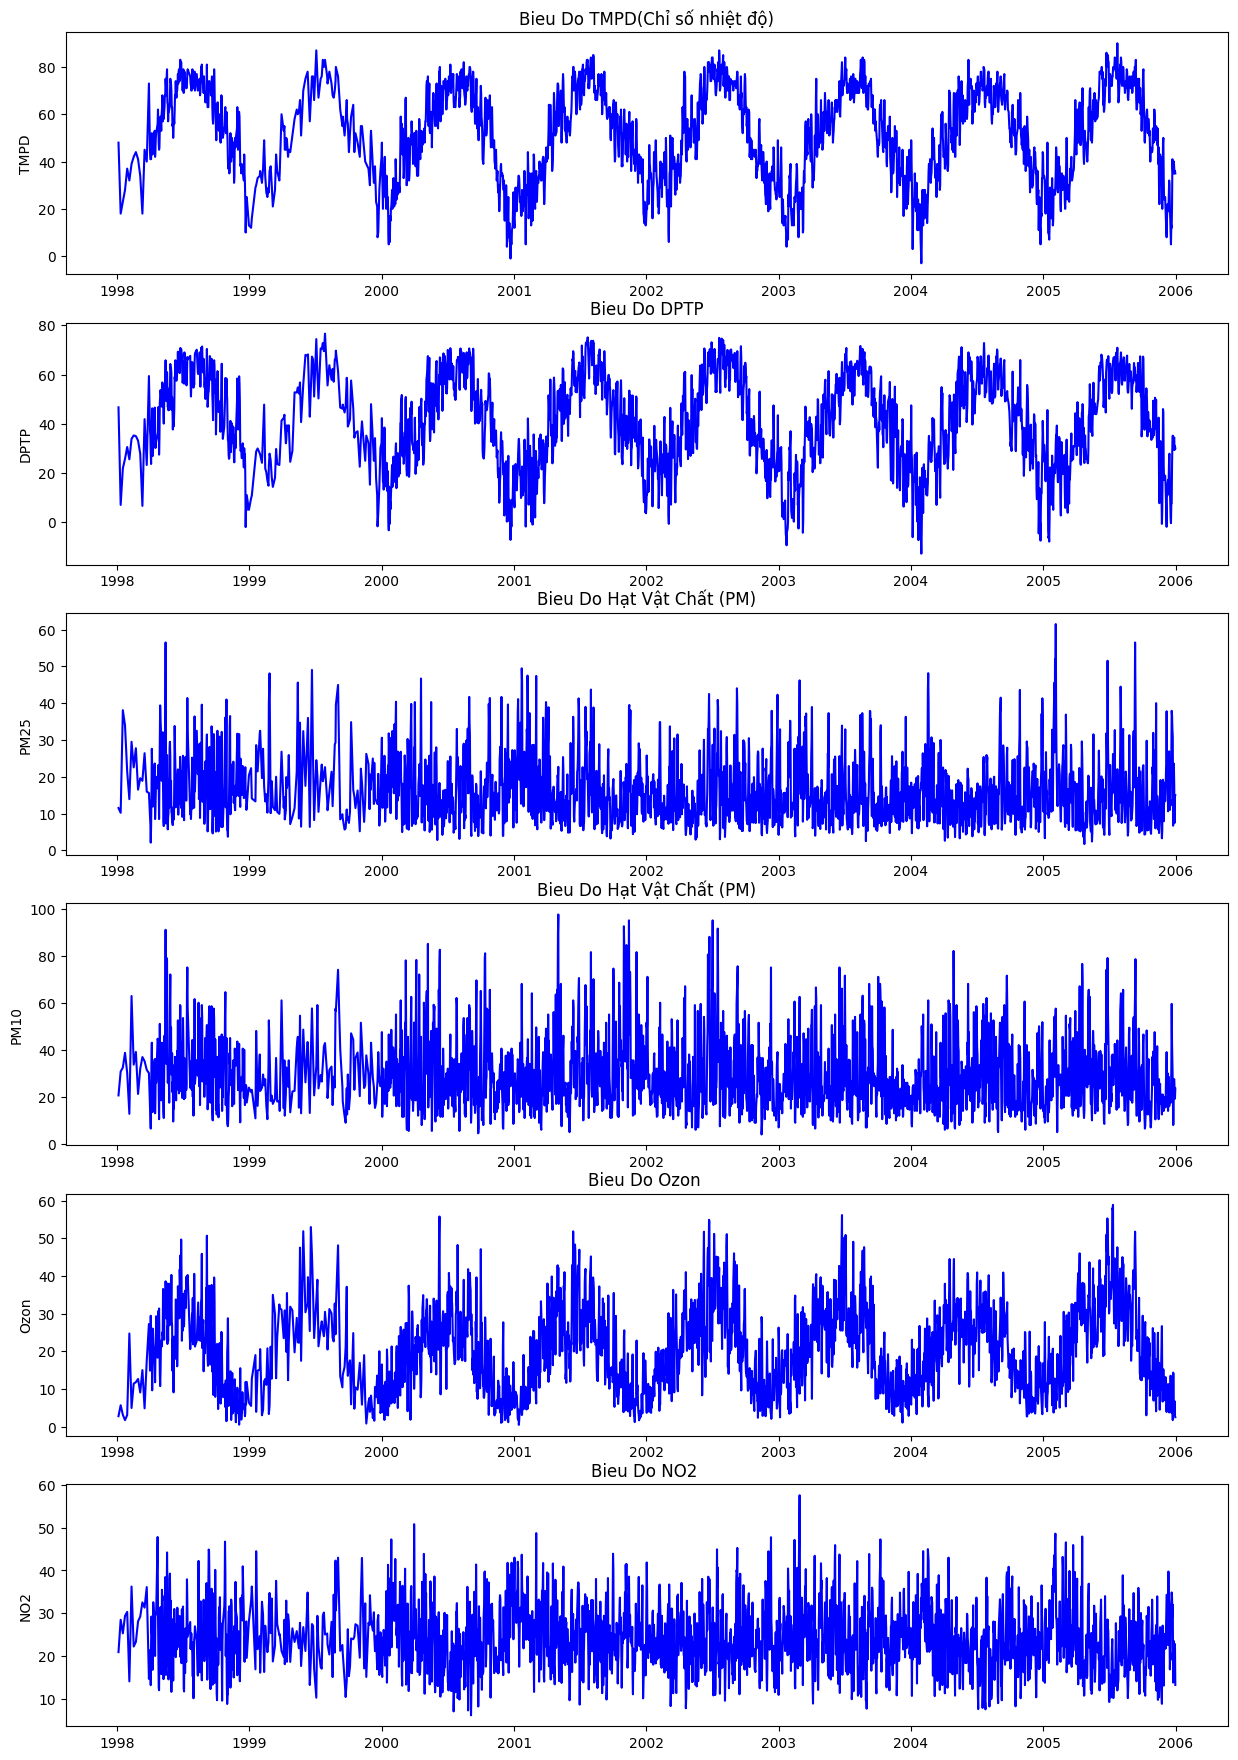

In [ ]:
plt.figure(figsize = (15,22))

plt.subplot(611)
# Vẽ biểu đồ quan sát TMPD
plt.plot(df['date'],df['tmpd'],color = "Blue")
plt.gca().set(title = "Bieu Do TMPD(Chỉ số nhiệt độ)" , ylabel = "TMPD")

plt.subplot(612)
# Vẽ biểu đồ quan sát DPTP
plt.plot(df['date'],df['dptp'],color = "Blue")
plt.gca().set(title = "Bieu Do DPTP" , ylabel = "DPTP")

plt.subplot(613)
# Vẽ biểu đồ quan sát PM25
plt.plot(df['date'],df['pm25tmean2'],color = "Blue")
plt.gca().set(title = "Bieu Do Hạt Vật Chất (PM)" , ylabel = "PM25")

plt.subplot(614)
# Vẽ biểu đồ quan sát PM10
plt.plot(df['date'],df['pm10tmean2'],color = "Blue")
plt.gca().set(title = "Bieu Do Hạt Vật Chất (PM)", ylabel = "PM10")

plt.subplot(615)
# Vẽ biểu đồ quan sát Ozon 
plt.plot(df['date'],df['o3tmean2'],color = "Blue")
plt.gca().set(title = "Bieu Do Ozon ", ylabel = "Ozon")

plt.subplot(616)
# Vẽ biểu đồ quan sát NO2
plt.plot(df['date'],df['no2tmean2'],color = "Blue")
plt.gca().set(title = "Bieu Do NO2 " , ylabel = "NO2")

plt.show()

In [ ]:
df_monthly = df.groupby(pd.Grouper(key = 'date' , freq = "M")).sum().iloc[:, 1:7]
df_monthly = df_monthly.reset_index()
df_monthly['month'] = df_monthly.date.dt.month
df_monthly['year'] = df_monthly.date.dt.year
df_monthly.head(5)

<ipython-input-488-d744af767503>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.groupby(pd.Grouper(key = 'date' , freq = "M")).sum().iloc[:, 1:7]


,date,tmpd,dptp,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2,month,year
0,1998-01-31,154.0,132.1,115.15,152.685897,16.536122,134.384039,1,1998
1,1998-02-28,198.0,163.0,110.20,169.615385,65.660628,123.951054,2,1998
2,1998-03-31,210.0,159.2,96.45,165.543706,73.859986,143.853655,3,1998
3,1998-04-30,1118.0,842.0,385.15,603.346154,492.657412,561.074843,4,1998
4,1998-05-31,2016.0,1635.9,605.25,1193.935897,924.826787,816.970322,5,1998


#	Phân tích dữ liệu: 

## Phân tích xu hướng của Nhiệt độ trung bình hàng tháng

In [ ]:
df_tmpd = df_monthly.pivot(index = "month" , columns = "year", values = "tmpd")
df_tmpd.head(12)

year,1998,1999,2000,2001,2002,2003,2004,2005
month,,,,,,,,
1,154.0,190.0,791.0,750.0,965.0,608.0,603.0,693.0
2,198.0,295.0,993.0,735.0,907.0,590.0,783.0,871.0
3,210.0,323.0,1378.0,1067.0,1081.0,914.0,1285.0,971.0
4,1118.0,479.0,1422.0,1583.0,1458.0,1377.0,1518.0,1492.0
5,2016.0,428.0,1930.0,1868.0,1721.0,1538.0,1755.0,1605.0
6,2086.0,570.0,2024.0,2030.0,2137.0,1829.0,2021.0,2233.0
7,1839.0,627.0,2208.0,2319.0,2395.0,2173.0,2215.0,1972.0
8,1829.0,659.0,2252.0,2277.0,2274.0,2288.0,2097.0,2089.0
9,2038.0,540.0,1950.0,1866.0,2026.0,1907.0,1607.0,2090.0


<Axes: xlabel='month'>

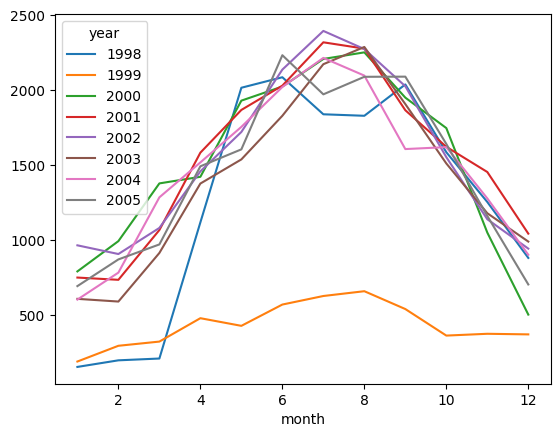

In [ ]:
df_tmpd.plot()

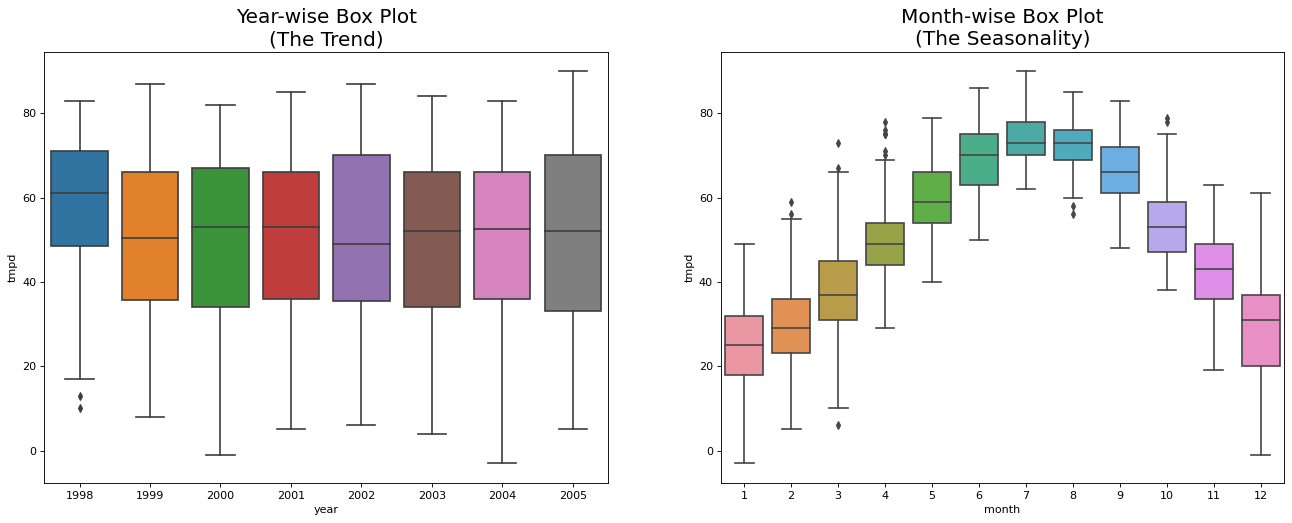

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='tmpd', data=df, ax=axes[0])
sns.boxplot(x='month', y='tmpd', data=df)


axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

Từ biểu đồ trên, ta có thể thấy nhiệt độ qua hàng năm có sự thay đổi không quá lớn. Nhưng xét về phương diện tháng tháng, Ta lại dễ dàng thấy được tháng 6, 7, 8 có mức nhiệt độ cao nhất trong năm. Cũng khá dễ hiểu vì đây là khoảng thời gian oi bức

## Phân tích xu hướng của tổng số hạt trong ngày

Kiểm tra giá trị của TMPD từng tháng 

In [ ]:
df_monthly = df.groupby(pd.Grouper(key = 'date' , freq = "M"))['tmpd'].sum()
df_monthly = df_monthly.reset_index()
df_monthly['month'] = df_monthly.date.dt.month
df_monthly['year'] = df_monthly.date.dt.year
df_monthly.head(5)

,date,tmpd,month,year
0,1998-01-31,154.0,1,1998
1,1998-02-28,198.0,2,1998
2,1998-03-31,210.0,3,1998
3,1998-04-30,1118.0,4,1998
4,1998-05-31,2016.0,5,1998


Kiểm tra chỉ số nhiệt độ và xu hướng của nó 

In [ ]:
df2 = df_monthly.pivot(index = "month" , columns = "year", values = "tmpd")
df2.head(12)


year,1998,1999,2000,2001,2002,2003,2004,2005
month,,,,,,,,
1,154.0,190.0,791.0,750.0,965.0,608.0,603.0,693.0
2,198.0,295.0,993.0,735.0,907.0,590.0,783.0,871.0
3,210.0,323.0,1378.0,1067.0,1081.0,914.0,1285.0,971.0
4,1118.0,479.0,1422.0,1583.0,1458.0,1377.0,1518.0,1492.0
5,2016.0,428.0,1930.0,1868.0,1721.0,1538.0,1755.0,1605.0
6,2086.0,570.0,2024.0,2030.0,2137.0,1829.0,2021.0,2233.0
7,1839.0,627.0,2208.0,2319.0,2395.0,2173.0,2215.0,1972.0
8,1829.0,659.0,2252.0,2277.0,2274.0,2288.0,2097.0,2089.0
9,2038.0,540.0,1950.0,1866.0,2026.0,1907.0,1607.0,2090.0


Vẽ biểu đồ TMPT từng tháng 

<Axes: xlabel='month'>

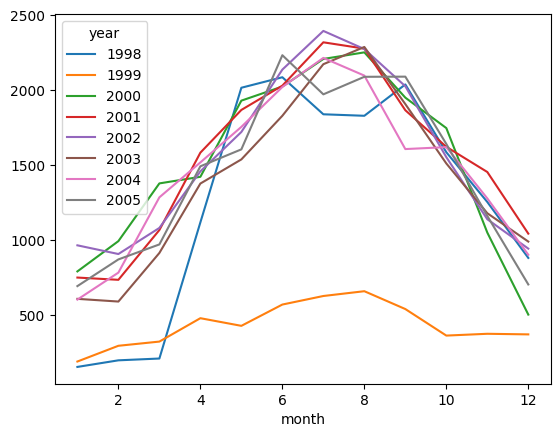

In [ ]:
df2.plot()

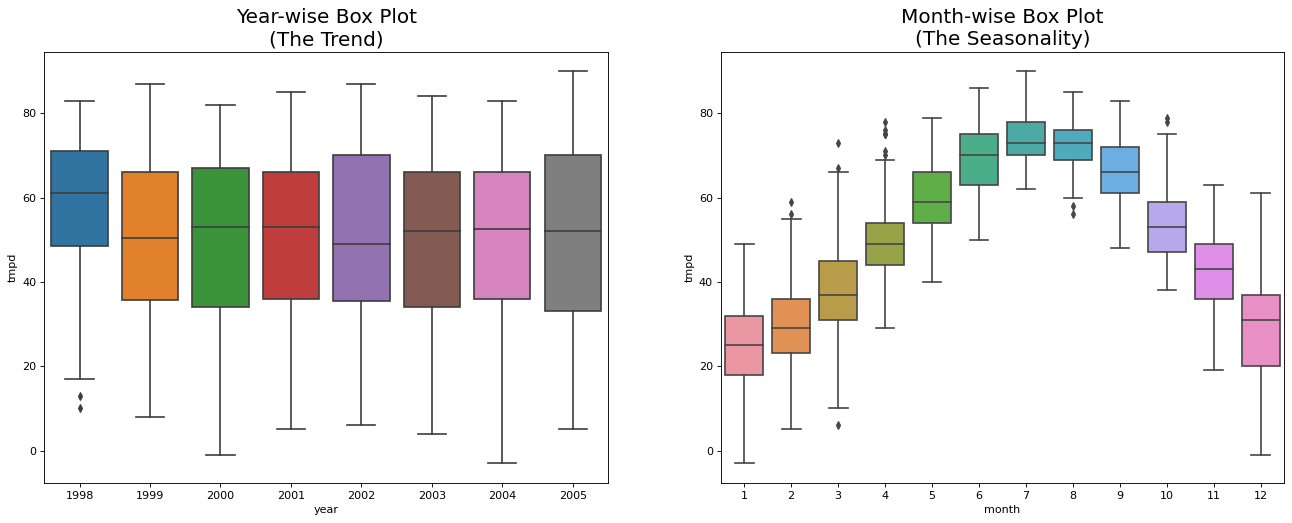

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='tmpd', data=df, ax=axes[0])
sns.boxplot(x='month', y='tmpd', data=df)


axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()


Từ 2 biểu đồ trên, ta có thể nhận thấy sự thay đổi nhiệt độ qua các năm là không nhiều. Xét qua từng tháng thì ta có thể thấy nhiệt độ các tháng có xu hướng tăng từ tháng 1 đến hết tháng 7 và bắt đầu nhiệt độ giảm xuống. Do 

**Tiếp theo chúng ta sẽ xét qua sự thay đổi của NO2 **


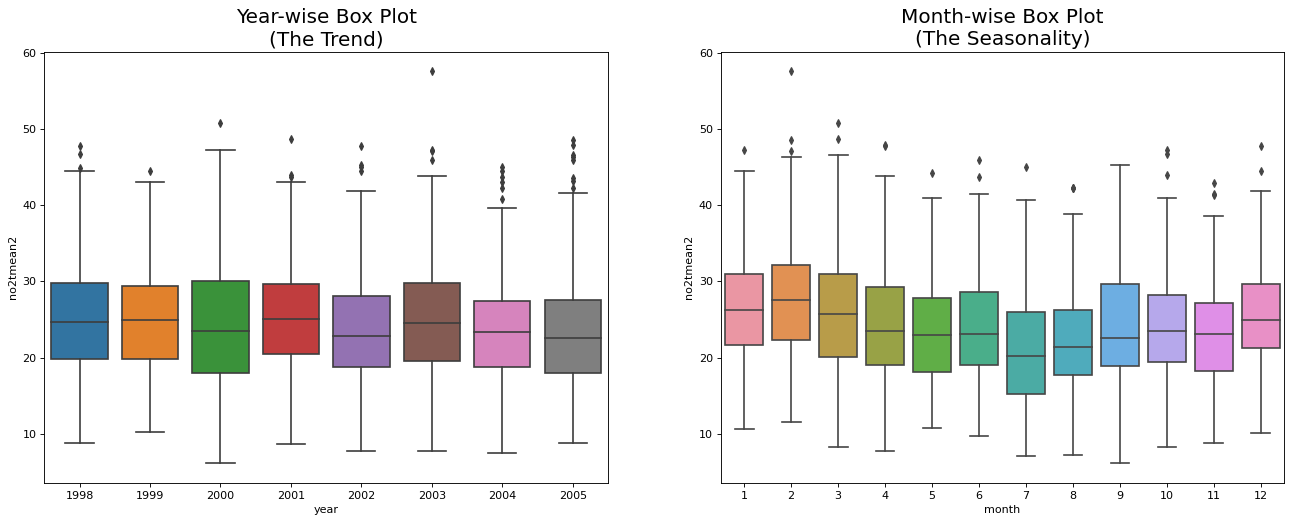

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='no2tmean2', data=df, ax=axes[0])
sns.boxplot(x='month', y='no2tmean2', data=df)


axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

## Tiếp theo chúng ta sẽ xét qua sự thay đổi của O3

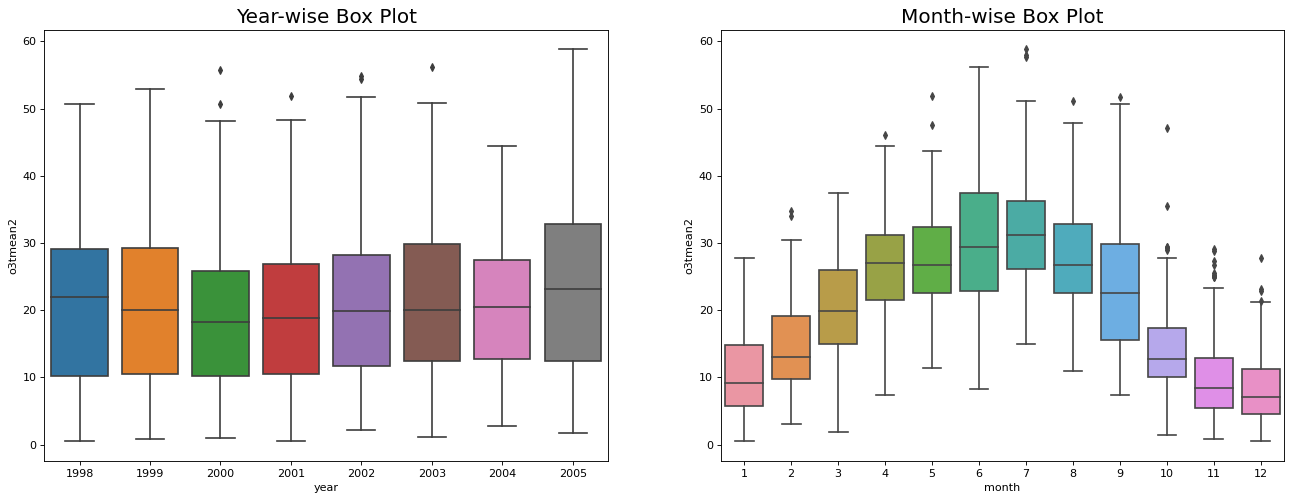

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='o3tmean2', data=df, ax=axes[0])
sns.boxplot(x='month', y='o3tmean2', data=df)


axes[0].set_title('Year-wise Box Plot', fontsize=18); 
axes[1].set_title('Month-wise Box Plot', fontsize=18)
plt.show()

Qua đây ta có thể thấy sự thay đổi qua các năm là không quá lớn, nhưng có sự chênh lệch rõ của năm 2004, 2005. Nhìn qua boxplot của các tháng, ta thấy nồng độ O3 đạt đỉnh điểm tại tháng 6

# Phát triển các khuyến nghị: 

# Mô Hình dự đoán

## Mô hình dự đoán TMPD

### Autoregressive Models

In [ ]:
df_monthly.drop(columns = ['month', 'year'], axis = 1, inplace = True)
df_monthly

,date,tmpd
0,1998-01-31,154.0
1,1998-02-28,198.0
2,1998-03-31,210.0
3,1998-04-30,1118.0
4,1998-05-31,2016.0
...,...,...
91,2005-08-31,2089.0
92,2005-09-30,2090.0
93,2005-10-31,1641.0
94,2005-11-30,1161.0


In [ ]:
df_monthly.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    96 non-null     datetime64[ns]
 1   tmpd    96 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [ ]:
ts_log = np.log(df['tmpd']) #  có tác dụng tính toán logarithm tự nhiên của cột ‘tmpd’

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


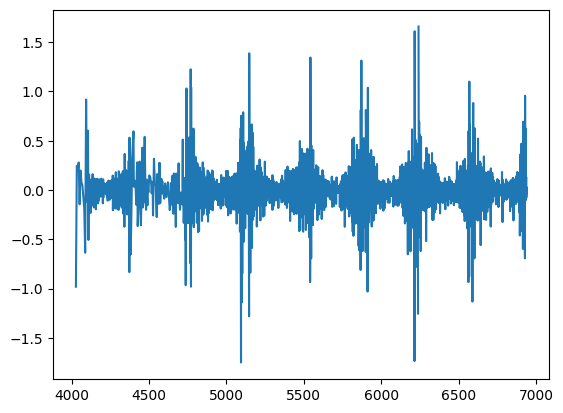

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

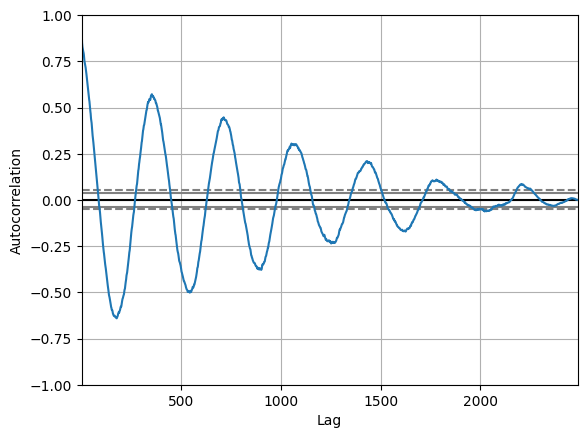

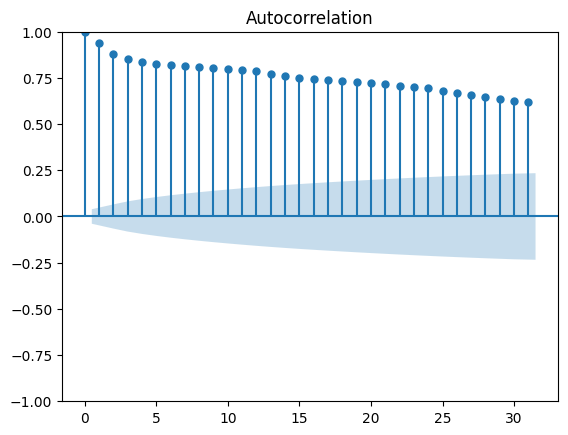

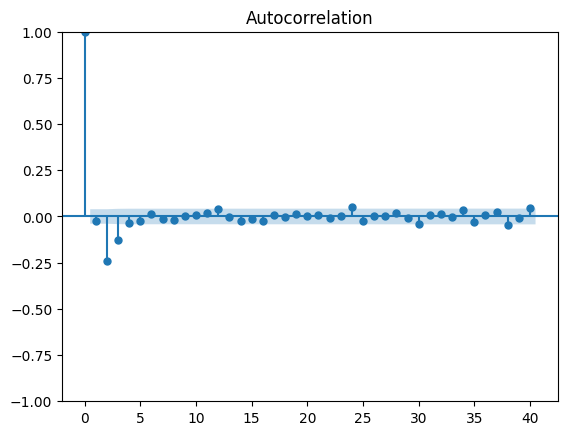

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['tmpd'])

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['tmpd'], lags=31)


ts_diff = np.diff(df['tmpd'])
df['tmpd_diff'] = np.append([0],ts_diff)
dataset = df['tmpd_diff'].values
plot_acf(df['tmpd_diff'], lags = 40)
plt.show()

In [ ]:
import os 
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.regression.linear_model import yule_walker

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


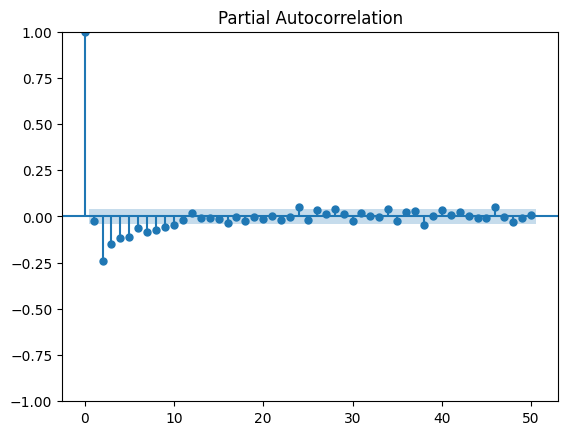

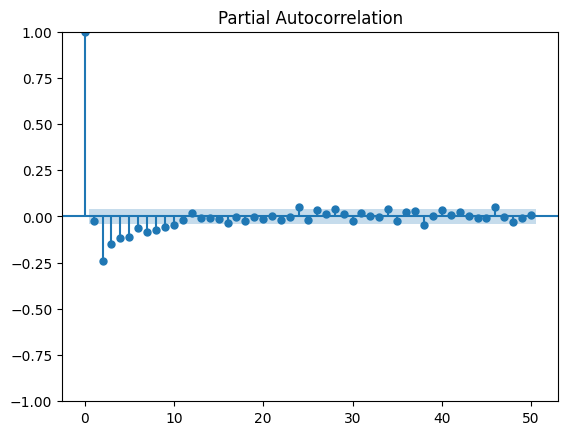

In [ ]:
plot_pacf(df['tmpd_diff'], lags = 50)

Xét chuối Time Serise  theo mo hình AR bậc 2 : 
X = 5 + 1,5*X[t- 1] - 0,6*X[t-2] + w 
với w normal(0,5) 

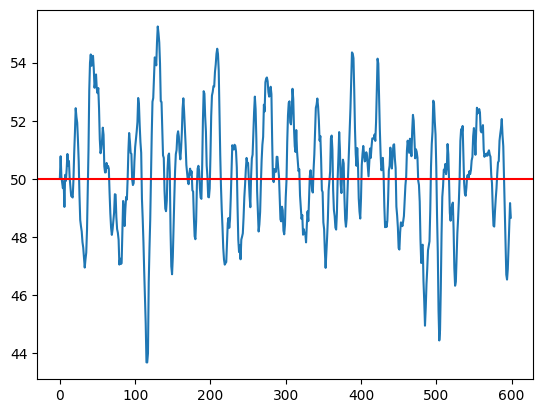

In [ ]:
p1 = 1.5 
p2 = -0.6 
c = 5 
w = 0.5
T = 600
mean = c/(1- p1 - p2)

ar_data = np.zeros(T)
ar_data[0] = mean + np.random.normal(0, w)
ar_data[1] = mean + np.random.normal(0, w)
for t in range(2, T):
    ar_data[t] = c + p1*ar_data[t-1] + p2*ar_data[t-2] + np.random.normal(0, w)


plt.plot(ar_data)
plt.axhline(y=mean, color='r', linestyle='-')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

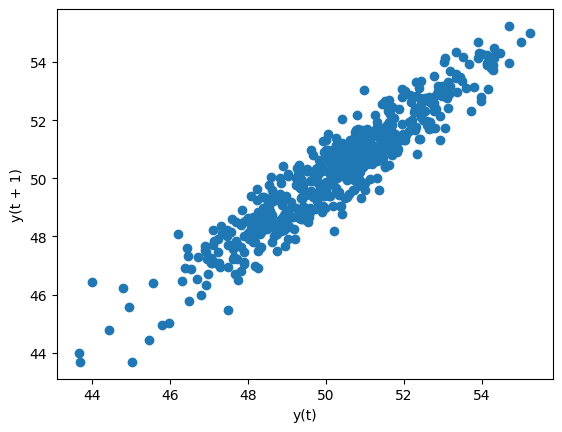

In [ ]:
from pandas.plotting import lag_plot
lag_plot(pd.DataFrame(ar_data))

In [ ]:
# lags = 2 
from statsmodels.tsa.ar_model import AutoReg
out = 'AIC : {0: 0.3f} , HQIC: {1:0.3f} , BIC: {2: 0.3f}'
model1 = AutoReg(ar_data, 2).fit()
print(out.format(model1.aic, model1.hqic, model1.bic))

AIC :  878.843 , HQIC: 885.685 , BIC:  896.417


In [ ]:
model2 = AutoReg(ar_data, 3 ).fit()
print(out.format(model2.aic, model2.hqic, model2.bic))

AIC :  875.288 , HQIC: 883.838 , BIC:  897.248


In [ ]:
pred = model1.predict(3, 100)
rmse = np.sqrt(mean_squared_error(ar_data[3:101], pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.499


In [ ]:
model = AutoReg(ar_data, lags=3, seasonal=True, period=12)
model_results = model.fit()
print(out.format(model_results.aic, model_results.hqic, model_results.bic))
print(f"Params of model: Trend={model.trend}, Seasonal={model.seasonal}, Period={ model.period}")

pred = model_results.predict(6, 300)
rmse = np.sqrt(mean_squared_error(ar_data[6:301], pred))
print('Test RMSE: %.3f' % rmse)

AIC :  891.464 , HQIC: 918.825 , BIC:  961.734
Params of model: Trend=c, Seasonal=True, Period=12
Test RMSE: 0.507


In [ ]:
def get_ar_model_results(data=None, lags=3, seasonal=False, period=12):
    model = AutoReg(data, lags=lags, seasonal=seasonal, period=period)
    model_results = model.fit()
    
    pred = model_results.predict(lags+1, len(data))
    rmse = np.sqrt(mean_squared_error(data[lags:], pred))
    return rmse, model_results.aic

list_lags = [ 3, 6, 9, 12]
list_seasonal = [True, False]
list_period = [ 6, 12, 18, 24] 

for id_lag, lags in enumerate(list_lags):
    for id_ss, seasonal in enumerate(list_seasonal):
        for id_period, period in enumerate(list_period):
            rmse, aic = get_ar_model_results(ar_data, lags, seasonal, period)
            print(f"Lag={lags}, Seasonal={seasonal}, Period={period}, RMSE={rmse}, AIC={aic}")


Lag=3, Seasonal=True, Period=6, RMSE=0.4360151754474865, AIC=881.8716181894038
Lag=3, Seasonal=True, Period=12, RMSE=0.43706678332745147, AIC=891.4638010125477
Lag=3, Seasonal=True, Period=18, RMSE=0.4428497486804561, AIC=891.3422288602844
Lag=3, Seasonal=True, Period=24, RMSE=0.44228761233437247, AIC=904.1754544519076
Lag=3, Seasonal=False, Period=6, RMSE=0.43436545577985286, AIC=875.288092220968
Lag=3, Seasonal=False, Period=12, RMSE=0.43436545577985286, AIC=875.288092220968
Lag=3, Seasonal=False, Period=18, RMSE=0.43436545577985286, AIC=875.288092220968
Lag=3, Seasonal=False, Period=24, RMSE=0.43436545577985286, AIC=875.288092220968
Lag=6, Seasonal=True, Period=6, RMSE=0.4388025658037056, AIC=883.0839163789053
Lag=6, Seasonal=True, Period=12, RMSE=0.4399915440452472, AIC=892.5866769560691
Lag=6, Seasonal=True, Period=18, RMSE=0.44582358882260353, AIC=892.1601593998582
Lag=6, Seasonal=True, Period=24, RMSE=0.44508560601585984, AIC=905.6637124025865
Lag=6, Seasonal=False, Period=6, RM

Coefficients: [-0.01156401 -0.11970414 -0.31069497 -0.22249853 -0.18806008 -0.16405273
 -0.08874976 -0.11489287 -0.07184569 -0.06711388 -0.03354112  0.00213142
  0.02278333]
predicted=2.973692, expected=7.000000
predicted=3.895099, expected=-1.000000
predicted=2.346699, expected=-6.000000
predicted=0.008335, expected=9.000000
predicted=0.718739, expected=3.000000
predicted=0.173494, expected=-1.000000
predicted=0.314980, expected=-1.000000
predicted=-0.077279, expected=4.000000
predicted=-0.701353, expected=4.000000
predicted=-1.122789, expected=2.000000
predicted=-0.403267, expected=6.000000
predicted=0.010169, expected=-2.000000
predicted=0.404161, expected=-9.000000
predicted=0.356267, expected=-8.000000
predicted=0.144217, expected=-5.000000
predicted=-0.004655, expected=-7.000000
predicted=0.013788, expected=10.000000
predicted=0.003225, expected=9.000000
predicted=-0.002940, expected=-6.000000
predicted=-0.055381, expected=-1.000000
predicted=-0.094866, expected=5.000000
predicte

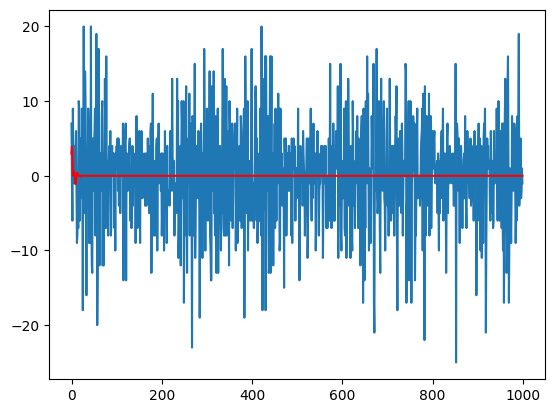

In [ ]:

ts_diff = np.diff(df['tmpd']) # tính hiệu số rời rạc
df['tmpd_diff1'] = np.append([0], ts_diff)
dataset = df['tmpd_diff1'].values
size_dataset = len(dataset)
train, valib = dataset[:size_dataset-1000], dataset[size_dataset-1000:]


model = AutoReg(train, lags=12)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


predictions = model_fit.predict(start=len(train), end=len(train)+len(valib)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], valib[i]))
 
rmse = np.sqrt(mean_squared_error(valib, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(valib)
plt.plot(predictions, color='red')
plt.show()

Từ đây ta có thể thấy dự đoán bằng mô hình AR model không phù hợp

### Mô hình dự đoán ARIMA 

 Khai báo thư viện

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.seasonal import seasonal_decompose
import os 
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

 Cài đặt thư viện pmdarima 

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 Mở file

In [ ]:
df = pd.read_csv("chicago_air_pollution.csv", index_col = 'date', parse_dates= True)
df.head(5)

,Unnamed: 0,city,tmpd,dptp,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
date,,,,,,,,
1987-01-01,0,chic,31.5,31.500,NaN,34.000000,4.250000,19.988095
1987-01-02,1,chic,33.0,29.875,NaN,NaN,3.304348,23.190994
1987-01-03,2,chic,33.0,27.375,NaN,34.166667,3.333333,23.815476
1987-01-04,3,chic,29.0,28.625,NaN,47.000000,4.375000,30.434524
1987-01-05,4,chic,32.0,28.875,NaN,NaN,4.750000,30.333333


In [ ]:
df['tmpd'].isnull().sum()

1

In [ ]:
df.dropna(subset = ['tmpd'],inplace = True)

In [ ]:
df['tmpd'].isnull().sum()

0

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


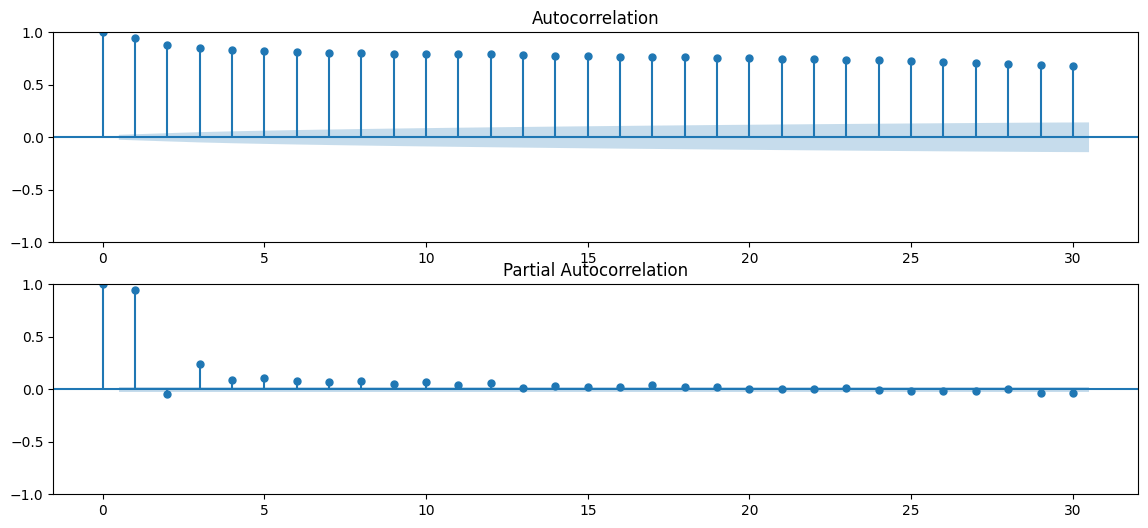

In [ ]:
plt.figure(figsize = [14,6])
plt.subplot(211)
plot_acf(df['tmpd'], ax = plt.gca(), lags = 30 )
plt.subplot(212)
plot_pacf(df['tmpd'], ax = plt.gca(), lags = 30)
plt.show()

In [ ]:
ts_log = np.log(df['tmpd'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


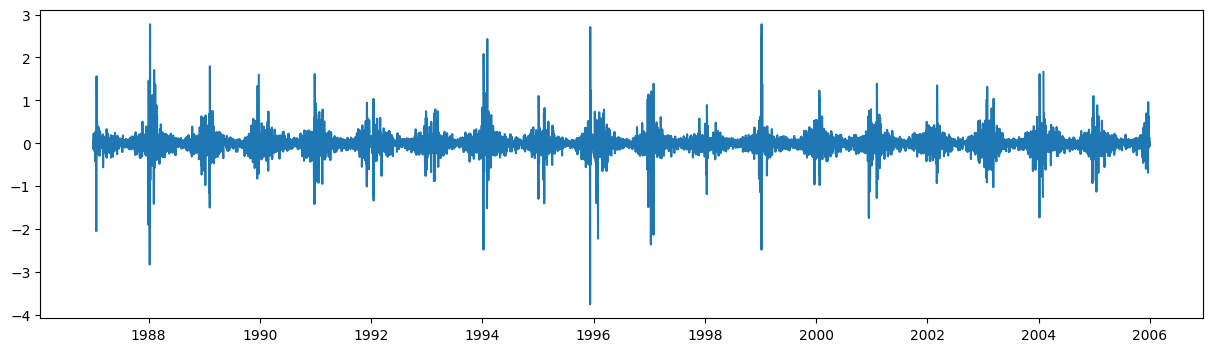

In [ ]:
plt.figure( figsize = [15,4])
ts_log_diff = ts_log - ts_log.shift() # Tính toán sự khác biệt giữa các giá trị trong chuỗi thời gian
plt.plot(ts_log_diff)
plt.show()

In [ ]:
ts = df['tmpd'] - df['tmpd'].shift()
ts.dropna(inplace=True)

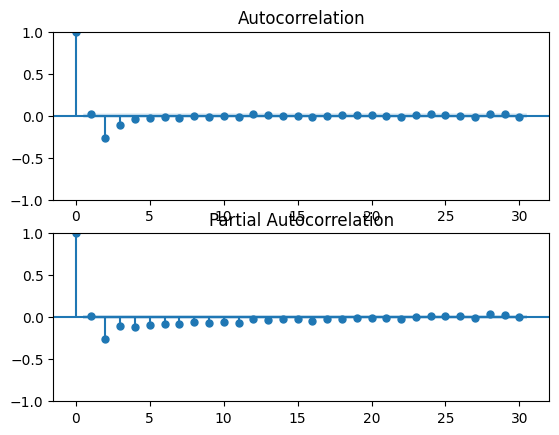

In [ ]:
plt.figure()
plt.subplot(211)
plot_acf(ts, ax=plt.gca(),lags=30)
plt.subplot(212)
plot_pacf(ts, ax=plt.gca(),lags=30)
plt.show()

In [ ]:
print(df.shape)

(6939, 8)


In [ ]:
train = df.iloc[:-2000]
test = df.iloc[-2000:]
print(train.shape, test.shape)

(4939, 8) (2000, 8)


In [ ]:
from pmdarima import auto_arima
model = auto_arima(df['tmpd'], trace = True, error_action = 'ignore' , suppress_warnings = True )
model.fit(df['tmpd'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=44881.288, Time=5.66 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=60856.243, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45639.576, Time=0.38 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=53852.058, Time=1.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=75033.686, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=45119.424, Time=2.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=45502.616, Time=6.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=44883.111, Time=14.01 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=44883.108, Time=14.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=45609.911, Time=2.33 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=44939.295, Time=6.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=44928.064, Time=6.43 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=44883.227, Time=5.77 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=44901.358, Time=1.17 sec

Best model:  ARI

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
model_fit = ARIMA(df['tmpd'], order = (2, 0, 2)).fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   tmpd   No. Observations:                 6939
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -22434.660
Date:                Mon, 22 May 2023   AIC                          44881.319
Time:                        18:00:46   BIC                          44922.389
Sample:                             0   HQIC                         44895.478
                               - 6939                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.2096      3.881     12.936      0.000      42.602      57.817
ar.L1          1.4404      0.023     64.011      0.000       1.396       1.485
ar.L2         -0.4441      0.022    -20.066      0.000      -0.487      -0.401
ma.L1         -0.5053      0.022    -23.082      0.000      -0.548      -0.462
ma.L2         -0.3085      0.013    -23.493      0.000      -0.334      -0.283
sigma2        37.6371      0.574     65.578      0.000      36.512      38.762
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               126.49
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.19
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start = start , end = end , typ = "levels")
print(pred)
pred.index = df.index[start : end + 1]
# pred = pd.DataFrame(pred,index = valid.index,columns=['Prediction'])
print(pred)

date
2000-07-10    79.119009
2000-07-11    69.928315
2000-07-12    69.511458
2000-07-13    72.281131
2000-07-14    74.099468
                ...    
2005-12-27    32.330879
2005-12-28    37.550260
2005-12-29    33.628081
2005-12-30    33.644302
2005-12-31    34.882784
Name: predicted_mean, Length: 2000, dtype: float64
date
2000-07-10    79.119009
2000-07-11    69.928315
2000-07-12    69.511458
2000-07-13    72.281131
2000-07-14    74.099468
                ...    
2005-12-27    32.330879
2005-12-28    37.550260
2005-12-29    33.628081
2005-12-30    33.644302
2005-12-31    34.882784
Name: predicted_mean, Length: 2000, dtype: float64


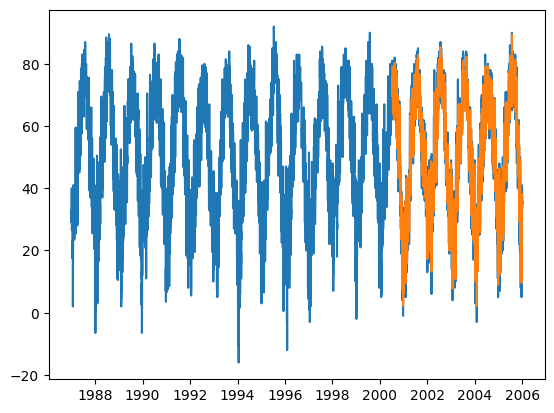

In [ ]:
plt.plot(df['tmpd'])
plt.plot(pred)

In [ ]:
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['tmpd']))
print(rmse)

6.036445282798493


## Mô hình dự đoán cho O3

### Mô hình dự đoán ARIMA 

In [ ]:
df = pd.read_csv("chicago_air_pollution.csv", index_col = "date", parse_dates= True )
df.head(12)

,Unnamed: 0,city,tmpd,dptp,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
date,,,,,,,,
1987-01-01,0,chic,31.5,31.500,NaN,34.000000,4.250000,19.988095
1987-01-02,1,chic,33.0,29.875,NaN,NaN,3.304348,23.190994
1987-01-03,2,chic,33.0,27.375,NaN,34.166667,3.333333,23.815476
1987-01-04,3,chic,29.0,28.625,NaN,47.000000,4.375000,30.434524
1987-01-05,4,chic,32.0,28.875,NaN,NaN,4.750000,30.333333
1987-01-06,5,chic,40.0,35.125,NaN,48.000000,5.833333,25.772331
1987-01-07,6,chic,34.5,26.750,NaN,41.000000,9.291667,20.581710
1987-01-08,7,chic,29.0,22.000,NaN,36.000000,11.291667,17.037231
1987-01-09,8,chic,26.5,29.000,NaN,33.285714,4.500000,23.388889


In [ ]:
df['o3tmean2'].isnull().sum()

0

<Axes: xlabel='date'>

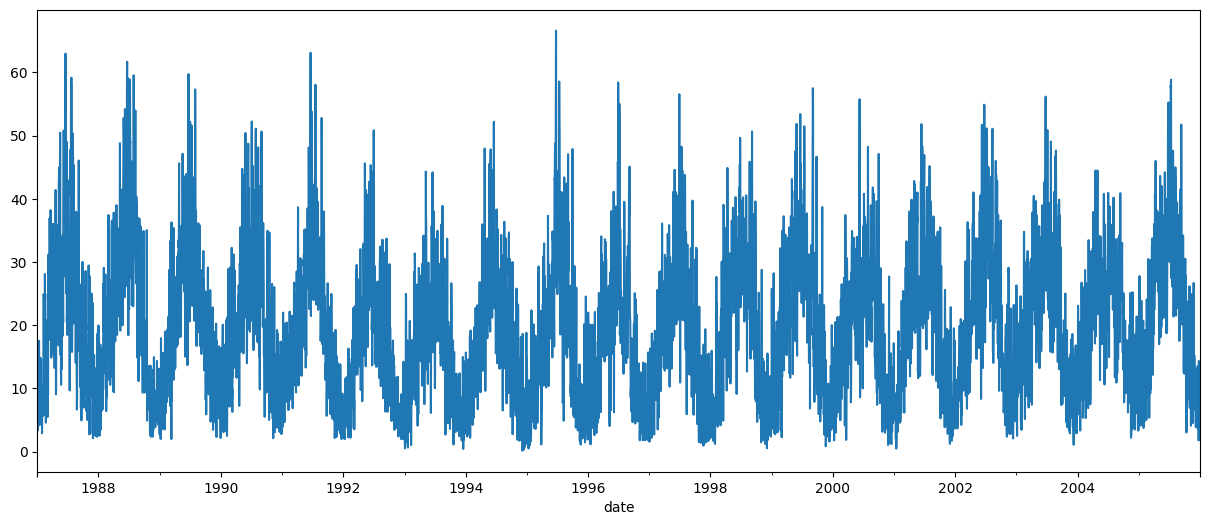

In [ ]:
df['o3tmean2'].plot(figsize = (15,6))

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


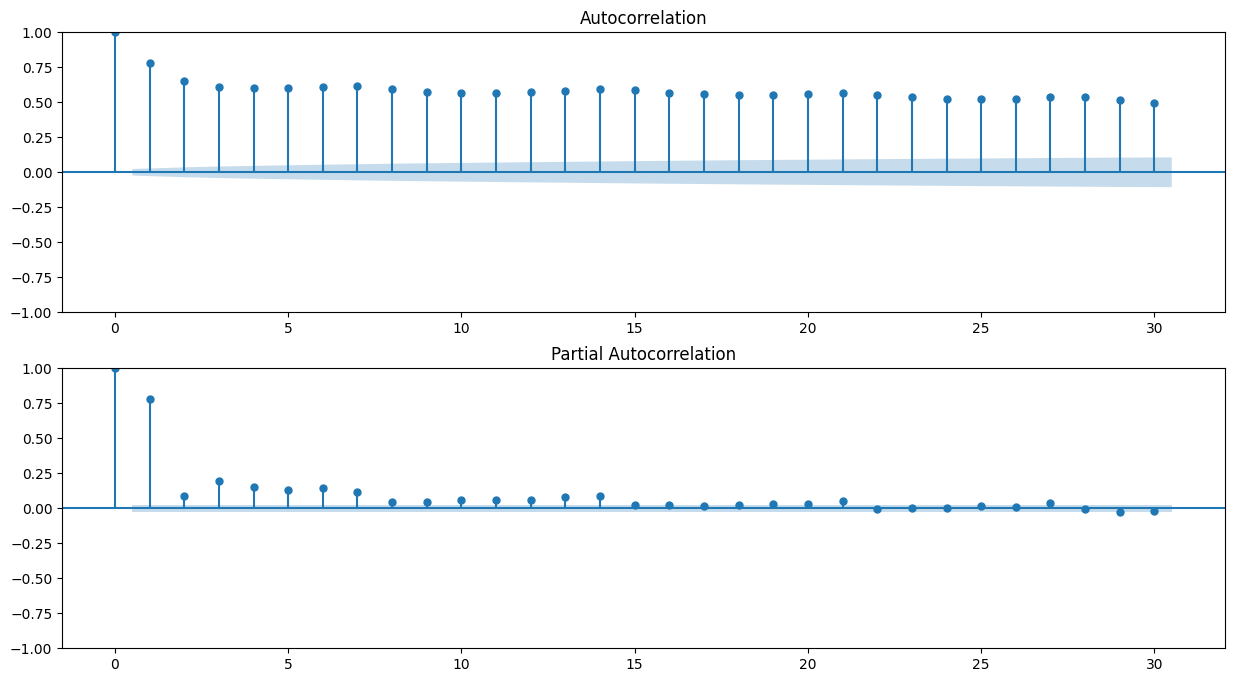

In [ ]:
plt.figure(figsize = (15,8))
plt.subplot(211)
plot_acf(df['o3tmean2'], ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(df['o3tmean2'], ax=plt.gca(), lags = 30)
plt.show()

In [ ]:
ts_log = np.log(df['o3tmean2'])

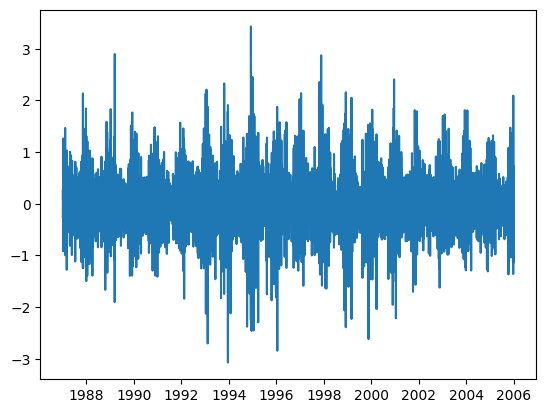

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [ ]:
ts = df['o3tmean2'] - df['o3tmean2'].shift()
ts.dropna(inplace=True)

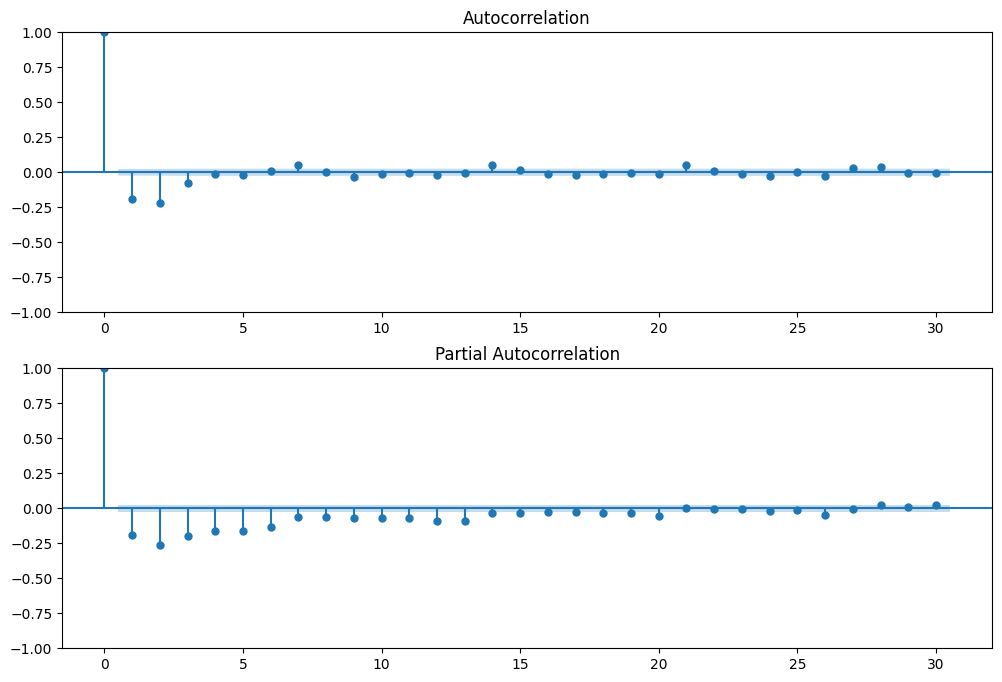

In [ ]:
plt.figure(figsize = (12,8))
plt.subplot(211)
plot_acf(ts, ax=plt.gca(),lags=30)
plt.subplot(212)
plot_pacf(ts, ax=plt.gca(),lags=30)
plt.show()

In [ ]:
print(df.shape)

(6940, 8)


In [ ]:
train = df.iloc[ :-1735]
test = df.iloc[-1735: ]

print(train.shape)
print(test.shape)

(5205, 8)
(1735, 8)


In [ ]:
model = auto_arima(df['o3tmean2'], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df['o3tmean2'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=45836.522, Time=4.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=47620.867, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=47374.979, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=46940.248, Time=1.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=47618.867, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=45842.371, Time=3.80 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=45834.636, Time=4.84 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=45940.979, Time=5.54 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=46873.024, Time=0.90 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=45836.554, Time=6.55 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=46604.157, Time=1.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=45838.457, Time=5.25 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=45832.636, Time=1.88 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=45938.979, Time=2.55 sec
 ARIMA(2,1,0)(0,0,0

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
model = ARIMA(df['o3tmean2'], order=(2, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               o3tmean2   No. Observations:                 6940
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -22912.318
Date:                Mon, 22 May 2023   AIC                          45832.636
Time:                        18:01:38   BIC                          45860.016
Sample:                    01-01-1987   HQIC                         45842.075
                         - 12-31-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4800      0.012     40.550      0.000       0.457       0.503
ar.L2         -0.1326      0.012    -11.323      0.000      -0.155      -0.110
ma.L1         -0.8962      0.007   -137.073      0.000      -0.909      -0.883
sigma2        43.2021      0.651     66.395      0.000      41.927      44.477
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               190.17
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.30
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start = start , end = end , typ = "levels")
print(pred)
pred.index = df.index[start : end + 1]
# pred = pd.DataFrame(pred,index = valid.index,columns=['Prediction'])
print(pred)

2001-04-02    24.004788
2001-04-03    17.671450
2001-04-04    31.896266
2001-04-05    24.173499
2001-04-06    18.429977
                ...    
2005-12-27    10.352610
2005-12-28     5.188772
2005-12-29     5.677607
2005-12-30     7.650120
2005-12-31     4.897792
Freq: D, Name: predicted_mean, Length: 1735, dtype: float64
date
2001-04-02    24.004788
2001-04-03    17.671450
2001-04-04    31.896266
2001-04-05    24.173499
2001-04-06    18.429977
                ...    
2005-12-27    10.352610
2005-12-28     5.188772
2005-12-29     5.677607
2005-12-30     7.650120
2005-12-31     4.897792
Name: predicted_mean, Length: 1735, dtype: float64


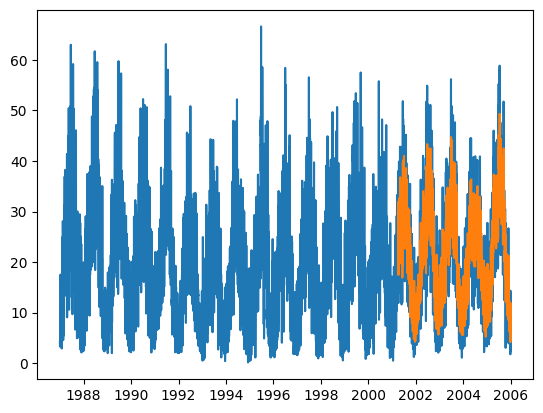

In [ ]:
plt.plot(df['o3tmean2'])
plt.plot(pred)

In [ ]:
rmse = sqrt(mean_squared_error(pred,test['o3tmean2']))
print(rmse)

6.587644317991557


### Mô hình dự đoán LSTM 

In [ ]:
df_LSTM = df[['o3tmean2']]
df_LSTM.index.freq = "D"

In [ ]:
df_LSTM.head()

,o3tmean2
date,
1987-01-01,4.250000
1987-01-02,3.304348
1987-01-03,3.333333
1987-01-04,4.375000
1987-01-05,4.750000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()

In [ ]:
trains = df_LSTM.iloc[:-2000]
tests = df_LSTM.iloc[-2000: ]

In [ ]:
scaler.fit(trains)
scaled_train = scaler.transform(trains)
scaled_valid = scaler.transform(tests)

In [ ]:
scaled_train[:10]

array([[0.0616729 ],
       [0.0474386 ],
       [0.0478749 ],
       [0.06355445],
       [0.06919909],
       [0.08550582],
       [0.13756193],
       [0.16766667],
       [0.065436  ],
       [0.072335  ]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [ ]:
print(len(scaled_train), len(generator))

4940 4937


In [ ]:
x,y = generator[0]
print(f"Given the Array: \n{x.flatten()}")
print(f"Predict this y: \n{y}")

Given the Array: 
[0.0616729 0.0474386 0.0478749]
Predict this y: 
[[0.06355445]]


In [ ]:
x.shape

(1, 3, 1)

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(100,activation = 'relu', input_shape = (n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator, epochs = 50)

Epoch 1/50
4937/4937 [==============================] - 15s 3ms/step - loss: 0.0133
Epoch 2/50
4937/4937 [==============================] - 14s 3ms/step - loss: 0.0115
Epoch 3/50
4937/4937 [==============================] - 14s 3ms/step - loss: 0.0113
Epoch 4/50
4937/4937 [==============================] - 14s 3ms/step - loss: 0.0111
Epoch 5/50
4937/4937 [==============================] - 14s 3ms/step - loss: 0.0112
Epoch 6/50
4937/4937 [==============================] - 16s 3ms/step - loss: 0.0112
Epoch 7/50
4937/4937 [==============================] - 14s 3ms/step - loss: 0.0111
Epoch 8/50
4937/4937 [==============================] - 14s 3ms/step - loss: 0.0110
Epoch 9/50
4937/4937 [==============================] - 14s 3ms/step - loss: 0.0110
Epoch 10/50
4937/4937 [==============================] - 14s 3ms/step - loss: 0.0109
Epoch 11/50
4937/4937 [==============================] - 14s 3ms/step - loss: 0.0110
Epoch 12/50
4937/4937 [==============================] - 14s 3ms/step - lo

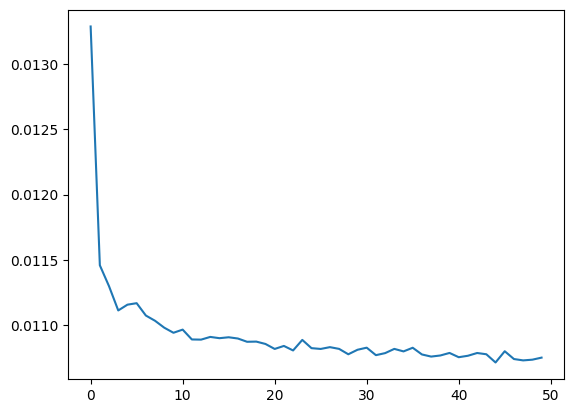

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-3 : ]

In [ ]:
last_train_batch = last_train_batch.reshape(1, n_input, n_features)

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 233ms/step


array([[0.41756463]], dtype=float32)

In [ ]:
scaled_valid[0]

array([0.48867618])

In [ ]:
tests_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
for i in range(len(tests)):
  current_pred = model.predict(current_batch)[0]

  tests_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis = 1)

1/1 [==============================] - 0s 20ms/step


In [ ]:
tests_predictions

[array([0.41756463], dtype=float32),
 array([0.44072902], dtype=float32),
 array([0.44306087], dtype=float32),
 array([0.4359717], dtype=float32),
 array([0.4345484], dtype=float32),
 array([0.43536928], dtype=float32),
 array([0.43523502], dtype=float32),
 array([0.4347629], dtype=float32),
 array([0.43456262], dtype=float32),
 array([0.4344936], dtype=float32),
 array([0.43441617], dtype=float32),
 array([0.43434483], dtype=float32),
 array([0.43429852], dtype=float32),
 array([0.4342681], dtype=float32),
 array([0.43424505], dtype=float32),
 array([0.43422776], dtype=float32),
 array([0.43421543], dtype=float32),
 array([0.43420666], dtype=float32),
 array([0.43420026], dtype=float32),
 array([0.43419564], dtype=float32),
 array([0.43419227], dtype=float32),
 array([0.4341898], dtype=float32),
 array([0.43418807], dtype=float32),
 array([0.43418682], dtype=float32),
 array([0.4341859], dtype=float32),
 array([0.4341852], dtype=float32),
 array([0.43418476], dtype=float32),
 array([0

In [ ]:
tests.head()

,o3tmean2
date,
2000-07-11,32.617844
2000-07-12,36.794384
2000-07-13,33.199522
2000-07-14,32.657279
2000-07-15,26.871212


In [ ]:
true_predictions = scaler.inverse_transform(valid_predictions)

In [ ]:
tests['o3tmean3'] = true_predictions

<ipython-input-571-d94e99dc6222>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tests['o3tmean3'] = true_predictions


<Axes: xlabel='date'>

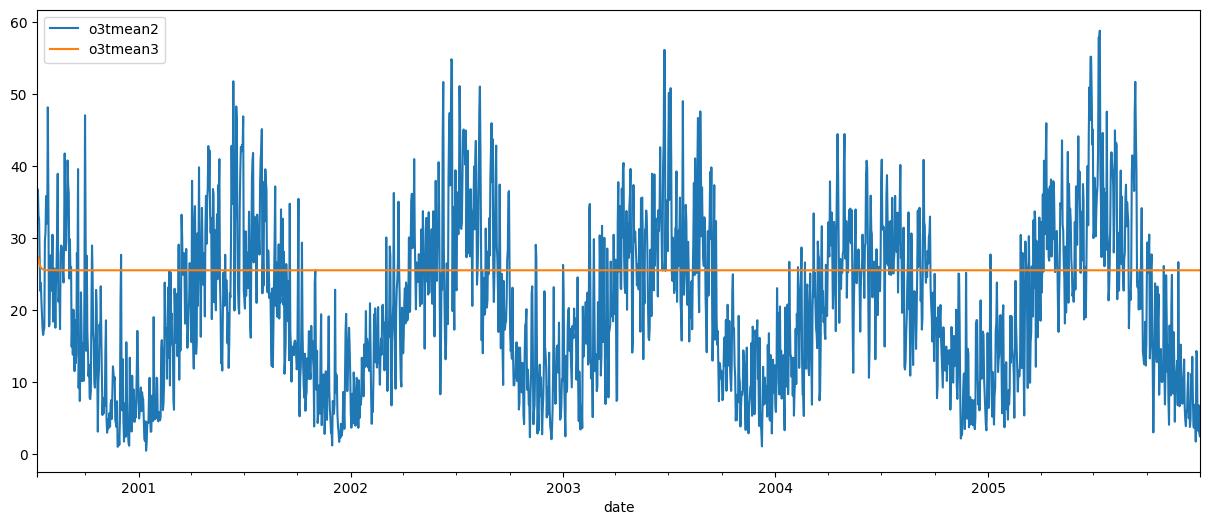

In [ ]:
tests.plot(figsize = (15,6))

Từ Biểu đồ trên, ta có thể thấy mô hình này không hợp để dự đoán 

## Mô hình dự đoán NO2

In [ ]:
df = pd.read_csv("chicago_air_pollution.csv", index_col = 'date', parse_dates= True)
df.head(5)

,Unnamed: 0,city,tmpd,dptp,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
date,,,,,,,,
1987-01-01,0,chic,31.5,31.500,NaN,34.000000,4.250000,19.988095
1987-01-02,1,chic,33.0,29.875,NaN,NaN,3.304348,23.190994
1987-01-03,2,chic,33.0,27.375,NaN,34.166667,3.333333,23.815476
1987-01-04,3,chic,29.0,28.625,NaN,47.000000,4.375000,30.434524
1987-01-05,4,chic,32.0,28.875,NaN,NaN,4.750000,30.333333


In [ ]:
df['no2tmean2'].isnull().sum()

0

<Axes: xlabel='date'>

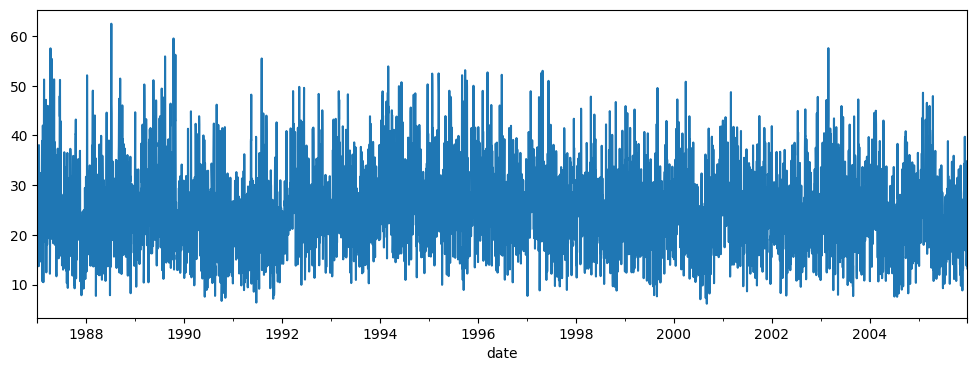

In [ ]:
df['no2tmean2'].plot(figsize = (12,4)) 

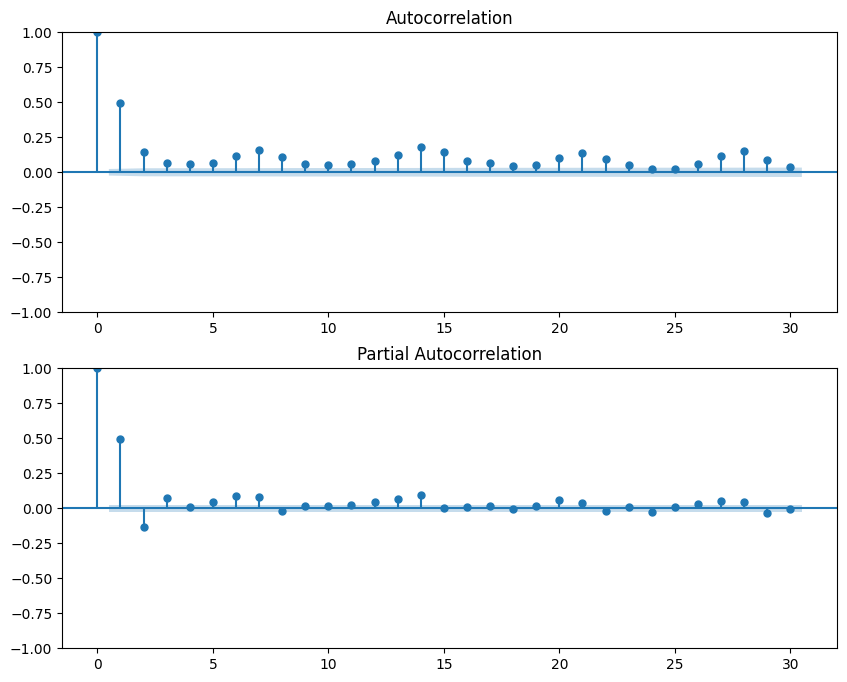

In [ ]:
plt.figure(figsize = (10,8))

plt.subplot(211)
plot_acf(df['no2tmean2'], ax = plt.gca() , lags = 30)

plt.subplot(212)
plot_pacf(df['no2tmean2'], ax = plt.gca(), lags = 30)

plt.show()

In [ ]:
ts_log = np.log(df['no2tmean2'])

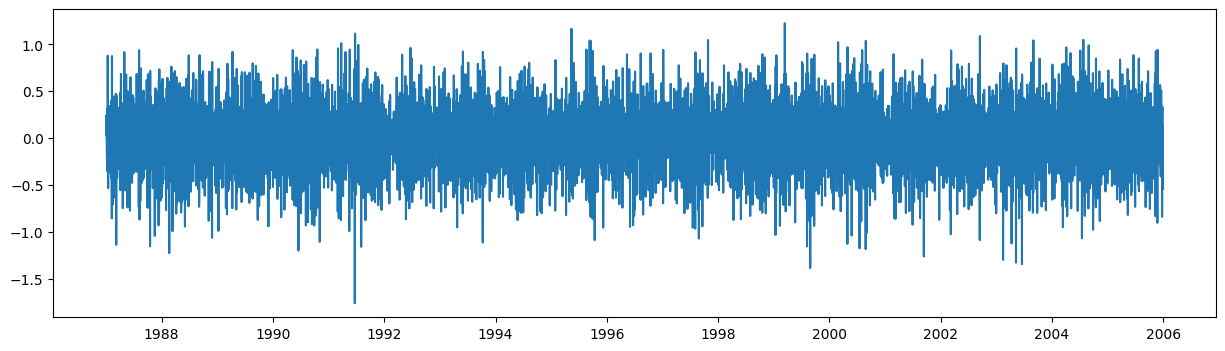

In [ ]:
plt.figure( figsize = [15,4])
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

In [ ]:
ts = df['no2tmean2'] - df['no2tmean2'].shift()
ts.dropna(inplace=True)

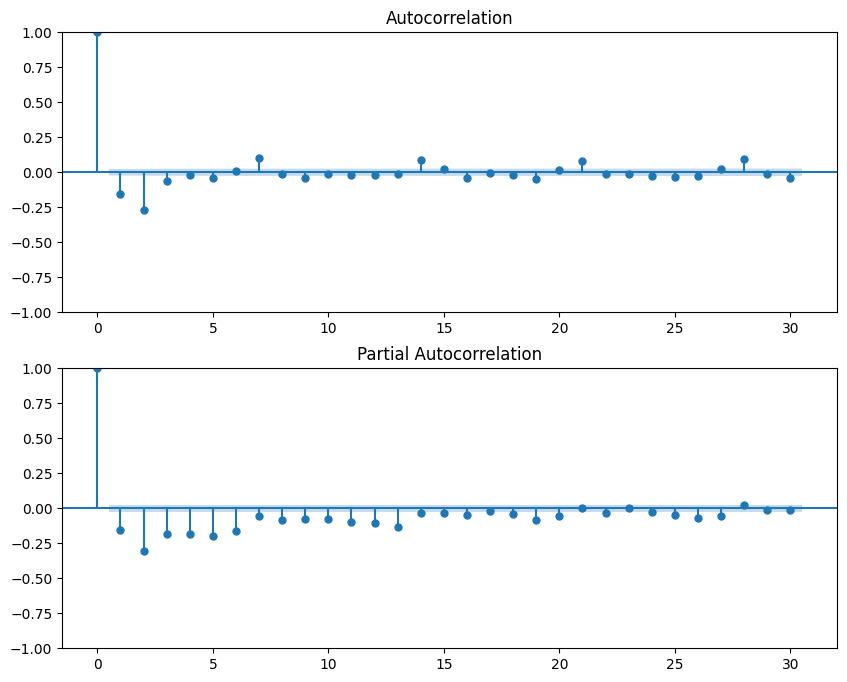

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(211)
plot_acf(ts, ax=plt.gca(),lags=30)
plt.subplot(212)
plot_pacf(ts, ax=plt.gca(),lags=30)
plt.show()

In [ ]:
print(df.shape)

(6940, 8)


In [ ]:
train = df.iloc[:-2000]
test = df.iloc[-2000:]
print(train.shape, test.shape)

(4940, 8) (2000, 8)


In [ ]:
model = auto_arima(df['no2tmean2'], trace = True, error_action = 'ignore' , suppress_warnings = True )
model.fit(df['no2tmean2'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=46313.052, Time=6.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=48616.214, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=48452.709, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=47911.795, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=48614.214, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=46315.318, Time=4.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=46318.541, Time=4.66 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=46313.597, Time=7.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=46313.145, Time=10.98 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=46515.526, Time=2.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=46314.373, Time=5.59 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=46315.372, Time=3.46 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=46315.599, Time=7.27 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=46311.075, Time=1.93 sec
 ARIMA(1,1,2)(0,0,

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
model_fit = ARIMA(df['no2tmean2'], order = (2, 1, 2)).fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              no2tmean2   No. Observations:                 6940
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -23150.537
Date:                Mon, 22 May 2023   AIC                          46311.075
Time:                        18:33:50   BIC                          46345.299
Sample:                    01-01-1987   HQIC                         46322.873
                         - 12-31-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3095      0.067      4.642      0.000       0.179       0.440
ar.L2         -0.0767      0.034     -2.287      0.022      -0.142      -0.011
ma.L1         -0.7594      0.066    -11.461      0.000      -0.889      -0.630
ma.L2         -0.2126      0.065     -3.253      0.001      -0.341      -0.085
sigma2        46.2636      0.731     63.255      0.000      44.830      47.697
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               109.63
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start = start , end = end , typ = "levels")
print(pred)
pred.index = df.index[start : end + 1]
print(pred)

2000-07-11    22.742598
2000-07-12    15.855400
2000-07-13    21.128041
2000-07-14    23.924342
2000-07-15    18.632402
                ...    
2005-12-27    22.330920
2005-12-28    24.507266
2005-12-29    21.185484
2005-12-30    22.539521
2005-12-31    23.685860
Freq: D, Name: predicted_mean, Length: 2000, dtype: float64
date
2000-07-11    22.742598
2000-07-12    15.855400
2000-07-13    21.128041
2000-07-14    23.924342
2000-07-15    18.632402
                ...    
2005-12-27    22.330920
2005-12-28    24.507266
2005-12-29    21.185484
2005-12-30    22.539521
2005-12-31    23.685860
Name: predicted_mean, Length: 2000, dtype: float64


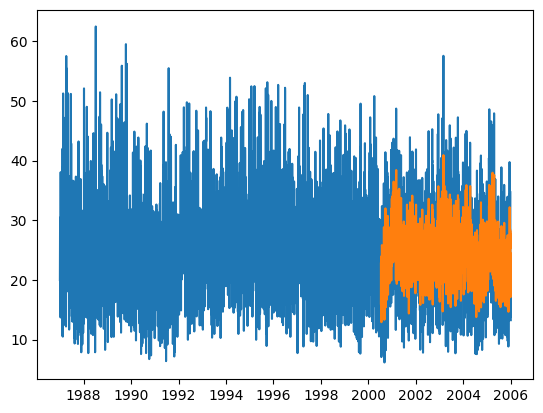

In [ ]:
plt.plot(df['no2tmean2'])
plt.plot(pred)

In [ ]:
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['no2tmean2']))
print(rmse)

6.514996427557551


Mô hình này có thể dùng được những độ chính xác của nó không quá đảm bảo, chỉ ở mức tạm ổn

# Mô hình dự đoán cho Tổng Áp suất hạt hàng ngày (DPTP)

## Mô hình dự đoán ARIMA 

In [ ]:
df['dptp'].isnull().sum()

2

In [ ]:
df.dropna(subset = ['dptp'], inplace = True)

In [ ]:
df['dptp'].isnull().sum()

0

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


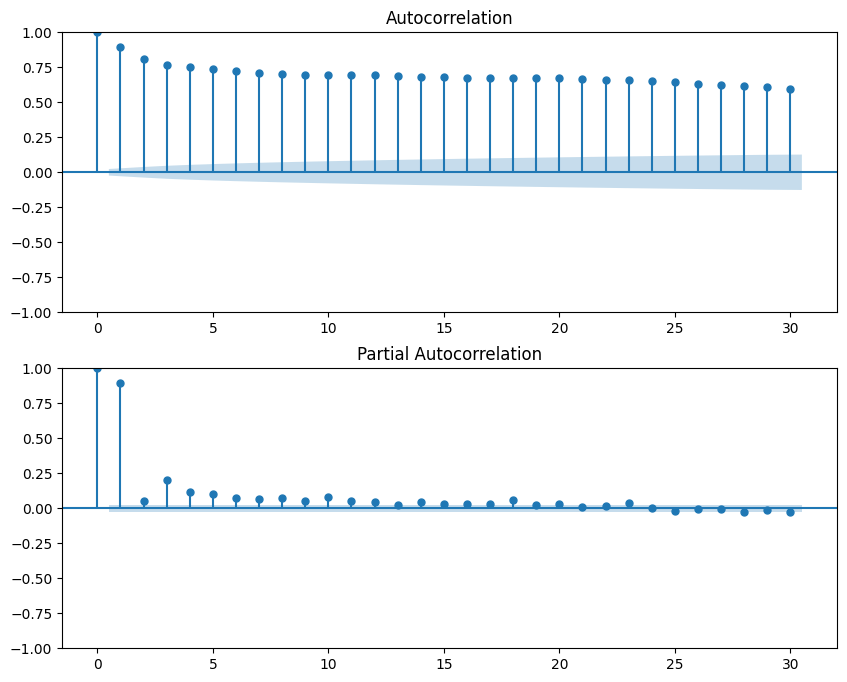

In [ ]:
plt.figure(figsize = (10,8))

plt.subplot(211)
plot_acf(df['dptp'] , ax = plt.gca(), lags = 30)

plt.subplot(212)
plot_pacf(df['dptp'], ax = plt.gca(), lags = 30)
plt.show()

In [ ]:
ts_log = np.log(df['dptp'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


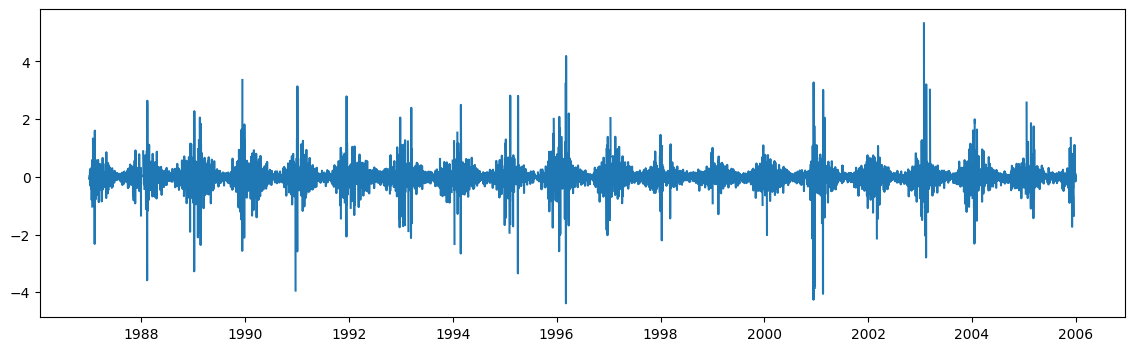

In [ ]:
plt.figure(figsize = (14,4))
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


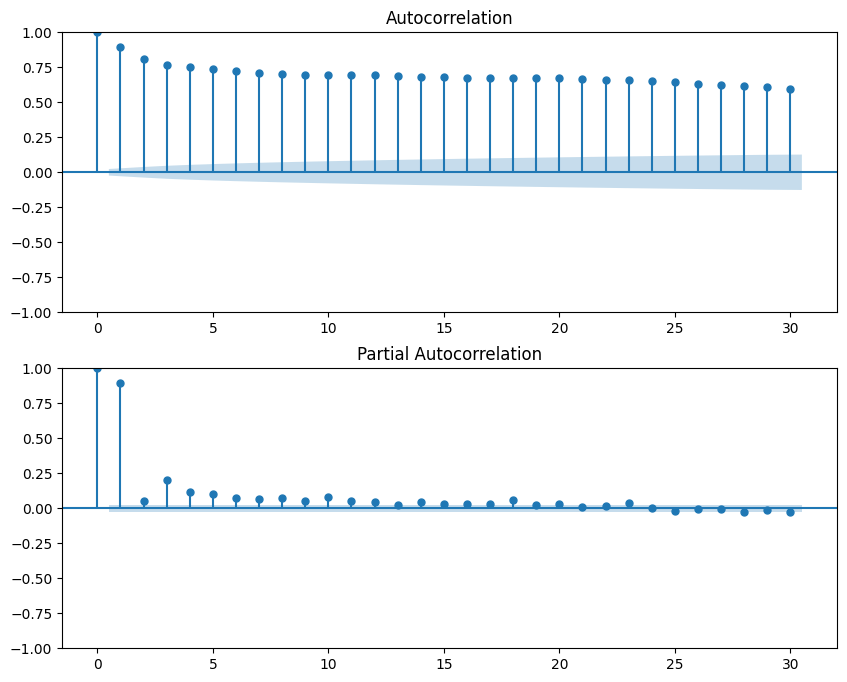

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(211)
plot_acf(df['dptp'], ax = plt.gca(), lags = 30)

plt.subplot(212)
plot_pacf(df['dptp'], ax = plt.gca(), lags = 30)

plt.show()

In [ ]:
model = auto_arima(df['dptp'], trace = True , error = 'ignore', suppress_warnings = True )
model.fit(df['dptp'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=48465.291, Time=11.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=60169.603, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=49172.404, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=54537.584, Time=3.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=72318.507, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=48640.868, Time=3.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=48574.653, Time=5.88 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=48466.177, Time=8.08 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=48465.948, Time=8.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=49136.434, Time=1.31 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=48506.365, Time=3.90 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=48476.339, Time=7.59 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=48467.501, Time=10.52 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=48486.585, Time=1.97 sec

Best model:  ARI

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
model_fit = ARIMA(df['dptp'], order = (2, 0 ,2))
model_fit = model_fit.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   dptp   No. Observations:                 6938
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -24226.654
Date:                Mon, 22 May 2023   AIC                          48465.309
Time:                        18:50:15   BIC                          48506.378
Sample:                             0   HQIC                         48479.467
                               - 6938                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.2922      3.358     11.999      0.000      33.711      46.873
ar.L1          1.4084      0.025     57.437      0.000       1.360       1.457
ar.L2         -0.4129      0.024    -17.175      0.000      -0.460      -0.366
ma.L1         -0.6495      0.025    -26.334      0.000      -0.698      -0.601
ma.L2         -0.2042      0.017    -12.269      0.000      -0.237      -0.172
sigma2        63.1541      0.918     68.817      0.000      61.355      64.953
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               485.63
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train = df.iloc[ :-2000]
test = df[-2000: ]

print(train.shape, test.shape)

(4938, 8) (2000, 8)


In [ ]:
start = len(train)
end = len(train) + len(test) - 1

pred = model_fit.predict(start = start , end = end , typ = 'levels')
print(pred)

pred.index = df.index[start : end + 1]
print(pred)

date
2000-07-09    63.269093
2000-07-10    67.251499
2000-07-11    64.984822
2000-07-12    62.543712
2000-07-13    58.671380
                ...    
2005-12-27    26.226317
2005-12-28    29.956782
2005-12-29    30.440704
2005-12-30    27.090973
2005-12-31    29.375838
Name: predicted_mean, Length: 2000, dtype: float64
date
2000-07-09    63.269093
2000-07-10    67.251499
2000-07-11    64.984822
2000-07-12    62.543712
2000-07-13    58.671380
                ...    
2005-12-27    26.226317
2005-12-28    29.956782
2005-12-29    30.440704
2005-12-30    27.090973
2005-12-31    29.375838
Name: predicted_mean, Length: 2000, dtype: float64


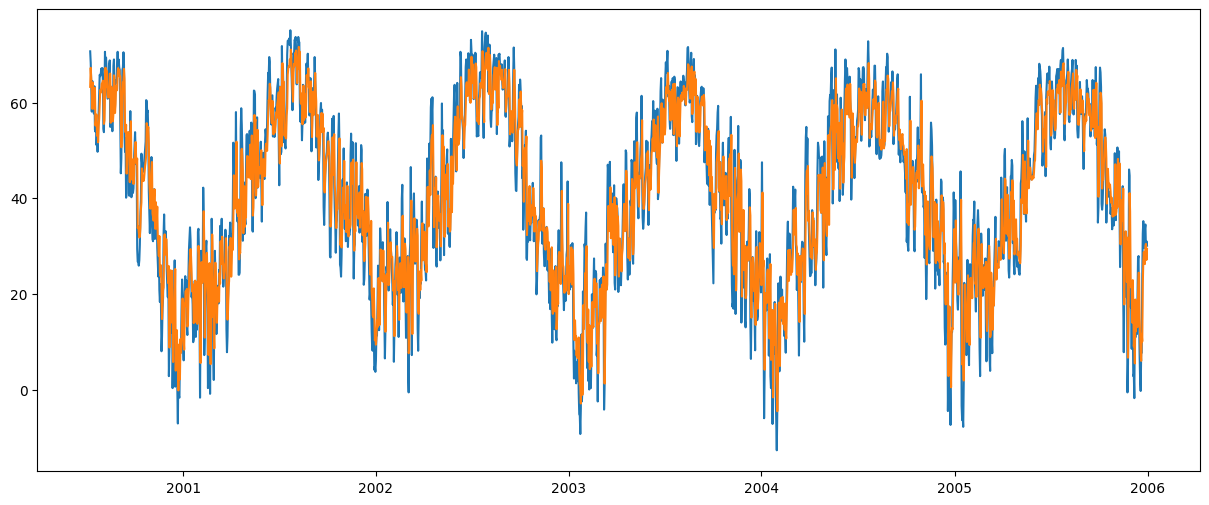

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(test['dptp'])
plt.plot(pred)

In [ ]:
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['dptp']))
print(rmse)

7.147118382582867


Từ mô hình trên, ta có thể thấy Mô hình ARIMA dự đoán nằm trong mức tương đối ổn